In [2]:
import numpy as np #To work with vector data ( to create dumm vector data )
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier  # we wont use this in the lab , we will write our own KNN from scratch
from sklearn.metrics import accuracy_score # Statics evaluating the mode's performance to see how well our model did 

In [3]:
iris_dataset = datasets.load_iris() # Load the iris dataset / Do not memorize this line
print(iris_dataset)



{'data': array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
     

In [4]:
# 
X = iris_dataset["data"]
Y = iris_dataset["target"]
feature_names = iris_dataset["feature_names"]
tartget_names = iris_dataset["target_names"]

print(X.shape)
print(Y.shape)

(150, 4)
(150,)


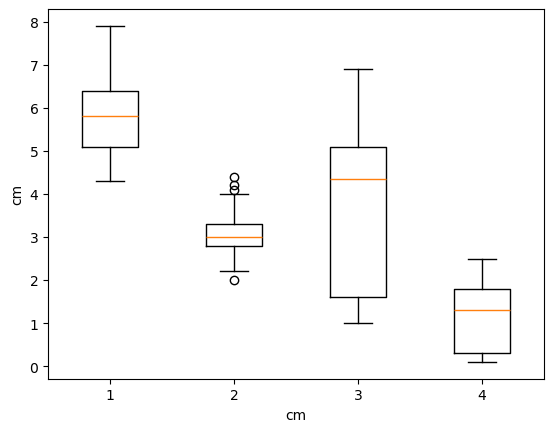

In [5]:
plt.figure() # This indicates we want a new, additional space on the output for a graph
# This is especially important when you have multiple graphs on the page, or graphs with multiple subplots
plt.boxplot(X)
# boxplot is a method that is used to visualize the spread of the data
plt.ylabel("cm")
plt.xlabel("cm")
plt.show()

In [6]:
#v Slicing X[:, :] # It means all rows and all columns

# Slicing X[:, 3:6] # It means all rows and columns 3 to 6



print(X[:,0]) # Gives us a 10 single column

[5.1 4.9 4.7 4.6 5.  5.4 4.6 5.  4.4 4.9 5.4 4.8 4.8 4.3 5.8 5.7 5.4 5.1
 5.7 5.1 5.4 5.1 4.6 5.1 4.8 5.  5.  5.2 5.2 4.7 4.8 5.4 5.2 5.5 4.9 5.
 5.5 4.9 4.4 5.1 5.  4.5 4.4 5.  5.1 4.8 5.1 4.6 5.3 5.  7.  6.4 6.9 5.5
 6.5 5.7 6.3 4.9 6.6 5.2 5.  5.9 6.  6.1 5.6 6.7 5.6 5.8 6.2 5.6 5.9 6.1
 6.3 6.1 6.4 6.6 6.8 6.7 6.  5.7 5.5 5.5 5.8 6.  5.4 6.  6.7 6.3 5.6 5.5
 5.5 6.1 5.8 5.  5.6 5.7 5.7 6.2 5.1 5.7 6.3 5.8 7.1 6.3 6.5 7.6 4.9 7.3
 6.7 7.2 6.5 6.4 6.8 5.7 5.8 6.4 6.5 7.7 7.7 6.  6.9 5.6 7.7 6.3 6.7 7.2
 6.2 6.1 6.4 7.2 7.4 7.9 6.4 6.3 6.1 7.7 6.3 6.4 6.  6.9 6.7 6.9 5.8 6.8
 6.7 6.7 6.3 6.5 6.2 5.9]


In [7]:
print(X[:,1]) # Gives us a 10 single column of the Second column

[3.5 3.  3.2 3.1 3.6 3.9 3.4 3.4 2.9 3.1 3.7 3.4 3.  3.  4.  4.4 3.9 3.5
 3.8 3.8 3.4 3.7 3.6 3.3 3.4 3.  3.4 3.5 3.4 3.2 3.1 3.4 4.1 4.2 3.1 3.2
 3.5 3.6 3.  3.4 3.5 2.3 3.2 3.5 3.8 3.  3.8 3.2 3.7 3.3 3.2 3.2 3.1 2.3
 2.8 2.8 3.3 2.4 2.9 2.7 2.  3.  2.2 2.9 2.9 3.1 3.  2.7 2.2 2.5 3.2 2.8
 2.5 2.8 2.9 3.  2.8 3.  2.9 2.6 2.4 2.4 2.7 2.7 3.  3.4 3.1 2.3 3.  2.5
 2.6 3.  2.6 2.3 2.7 3.  2.9 2.9 2.5 2.8 3.3 2.7 3.  2.9 3.  3.  2.5 2.9
 2.5 3.6 3.2 2.7 3.  2.5 2.8 3.2 3.  3.8 2.6 2.2 3.2 2.8 2.8 2.7 3.3 3.2
 2.8 3.  2.8 3.  2.8 3.8 2.8 2.8 2.6 3.  3.4 3.1 3.  3.1 3.1 3.1 2.7 3.2
 3.3 3.  2.5 3.  3.4 3. ]


Text(0, 0.5, 'sepal width (cm)')

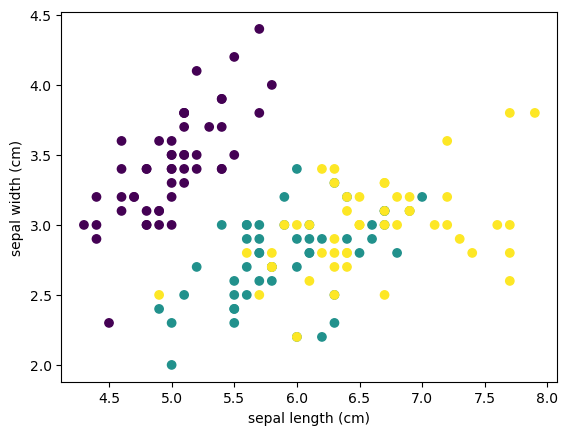

In [8]:
#Scatter plot of featue 1 vs feature 2 ( in order to determine if KNN clusters form)
#plt.scatter(horisontal_axis, vertical_axis, color)
plt.scatter(X[:, 0], X[: , 1], c=Y)
plt.xlabel(feature_names[0]) # reason for feature_names[0] is because we are plotting the first column
plt.ylabel(feature_names[1]) # reason for feature_names[1] is because we are plotting the second column

In [9]:
# Make the above code general and resuable by putting it into a function 

def plot_2_features(horizontal_axis, vertical_axis, h_a_label, v_a_label, Y):
    plt.scatter(horizontal_axis, vertical_axis, c=Y)
    plt.xlabel(h_a_label)
    plt.ylabel(v_a_label)
    plt.show()

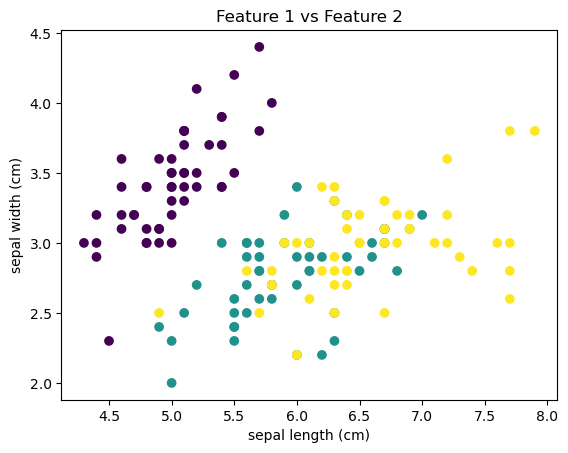

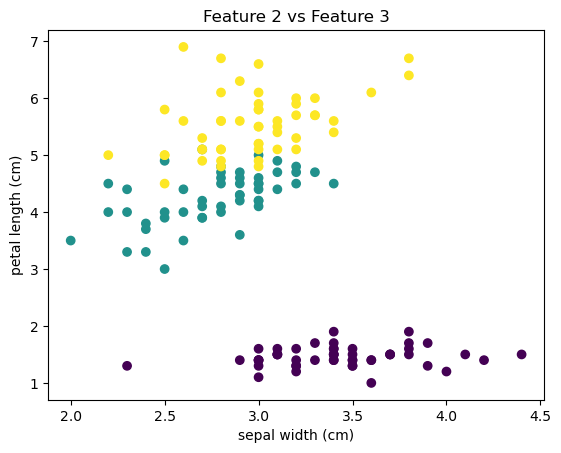

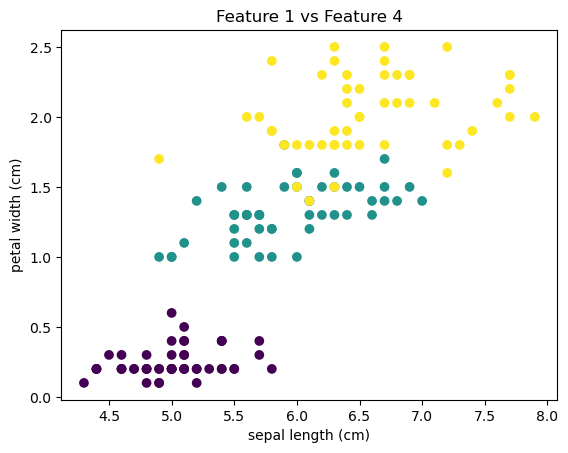

In [10]:
# Call the function plotting the different features against each other
plt.title("Feature 1 vs Feature 2")

plot_2_features(X[:, 0], X[:, 1], feature_names[0], feature_names[1], Y)

plt.title("Feature 2 vs Feature 3")
plot_2_features(X[:, 1], X[:, 2], feature_names[1], feature_names[2], Y)

plt.title("Feature 1 vs Feature 4")
plot_2_features(X[:, 0], X[:, 3], feature_names[0], feature_names[3], Y)

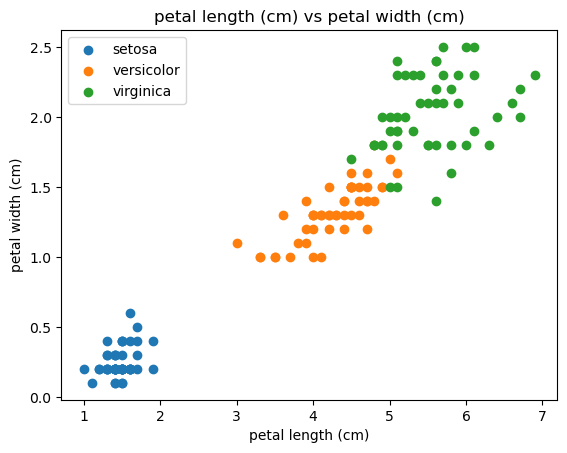

In [11]:
def plot_2_features_with_legend (horizontal_axis, vertical_axis, h_a_label, v_a_label, Y):
  plt.figure() # plt.figure() indicates we want a new, additional space on the outpur for a graph
  plt.title(h_a_label + " vs " + v_a_label)

  # This loops over the target names, extracting the index and each name one by one

  for i, target_name in enumerate(iris_dataset["target_names"]):
    # enumerate is a function that returns the index and the value of the
    # Each time in the loop, we plot the points where Y is equal to i
    plt.scatter(horizontal_axis[Y == i], vertical_axis[Y == i], label=target_name) # Give color and legend at the same time
    #                          X[:, 0][Y == 0] # This is a boolean mask that selects only the rows where Y is equal to 0
    # Example of plotting Feature 1 on the horizontal axis, first time in the loop

  plt.xlabel(h_a_label)
  plt.ylabel(v_a_label)
  plt.legend() # this will show the legend
  plt.show()

# Plot feature 3 vs feature 4 with legend
plot_2_features_with_legend(X[:, 2], X[:, 3], feature_names[2], feature_names[3], Y)



############## Laily's recording 1:09:25


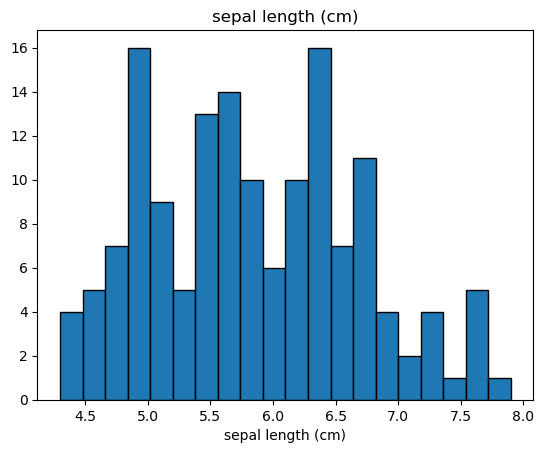

In [12]:
# plot the bar graph for each feature

plt.figure()
plt.hist(X[:,0], bins=20, edgecolor='black')
plt.title(feature_names[0])
plt.xlabel(feature_names[0])
plt.show()

In [16]:
# Now that we have looked at the data using multiple graphs, we see the clearest pattern is...
# cluster inside of the scatter plot graph

# straight-line distance (Shortest distance betweem tw points)

P = np.array([2,2]) # Create dummy data - Assign2 use ones() to create a vector of ones
Q = np.array([5,5])
distance = np.sqrt(np.sum((P-Q)**2)) # coded pythagorean theorem
distance


4.242640687119285

In [19]:
# 3D pythagoream formula C = sqrt(P1 - Q1)^2 + (P2 - Q2)^2 + (P3 - Q3)^2
P = np.array([1 ,2 ,3])
Q = np.array([4, 0, 8])

# Element by element vector calculation, where it automatically loops in C language

distance = np.sqrt(np.sum((Q-P)**2))
# numpy library does the calculation over the vector, so we dont have to expand the equation

# unlike in math, every time we add a new dimension (i.e every time we add a new FEATURE)
"
print(f"The straight-line distance between P and Q is {distance:.2f}")

SyntaxError: unterminated string literal (detected at line 9) (4058410544.py, line 9)

In [20]:
# The algorithm for KNN from scratch
# put the distance calculation into a function to make it reusable

def straight_line_distance(P, Q):
  distance =np.sqrt(np.sum((Q-P)**2))
  print(f"The straight-line distance between P and Q is {distance:.2f}")
  return distance

straight_line_distance(P, Q)

The straight-line distance between P and Q is 4.24


4.242640687119285

In [ ]:
# Split the entire feature set and the answers set into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

print(X_test[0])
new_test_flower = X_test[0]
# [(extract index, and calculate distance between (the new test flower, one flower from loop of training set))]
train_flower_distances = [(i, straight_line_distance(new_test_flower, one_of_train_flowers)) for i , one_of_train_flowers in enumerate(X_train)]